In [141]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [142]:
class Timer:
    def __init__(self, msg='Time elapsed'):
        self.msg = msg
    def __enter__(self):
        self.start = time.time()
        return self
    def __exit__(self, *args):
        self.end = time.time()
        duration = self.end - self.start
        print(f'{self.msg}: {duration:.2f}s')#.format(self.end - self.start))

In [143]:
class Event:
    __slots__ = 't', 'x', 'y', 'p'
    def __init__(self, t, x, y, p):
        self.t = t
        self.x = x
        self.y = y
        self.p = p
    def __repr__(self):
        return f'Event(t={self.t:.3f}, x={self.x}, y={self.y}, p={self.p})'

In [144]:
with Timer('Loading'):
    event_array = np.random.rand(1000000, 4)
    event_array = event_array[event_array[:, 0].argsort()]
    event_array[:, 1:3] = np.floor(event_array[:, 1:3]*10)
    print(event_array[:5,:])

[[6.96238026e-07 0.00000000e+00 6.00000000e+00 5.56920496e-01]
 [1.54582765e-06 0.00000000e+00 7.00000000e+00 8.29835430e-01]
 [2.85827786e-06 8.00000000e+00 4.00000000e+00 3.58674516e-01]
 [5.63783473e-06 6.00000000e+00 4.00000000e+00 7.08094524e-01]
 [9.25510048e-06 4.00000000e+00 2.00000000e+00 1.51847345e-01]]
Loading: 0.33s


In [145]:
with Timer('Converting'):
    event_list = []
    for event in event_array:
        t, x, y, p = event
        event_list.append(Event(t, int(x), int(y), -1 if p < 0.5 else 1))
    for e in event_list[:5]:
        print(e)

Event(t=0.000, x=0, y=6, p=1)
Event(t=0.000, x=0, y=7, p=1)
Event(t=0.000, x=8, y=4, p=-1)
Event(t=0.000, x=6, y=4, p=1)
Event(t=0.000, x=4, y=2, p=-1)
Converting: 5.85s


In [146]:
with Timer('Reconstruction'):
    image_state = np.zeros((10, 10), dtype=np.float32)
    for e in event_list:
        image_state[e.y, e.x] += e.p

Reconstruction: 5.73s


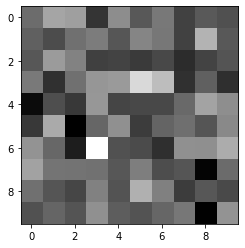

In [147]:
plt.imshow(image_state, cmap='gray')
plt.show()